In [1]:
%cd ../

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/hypertools/plot/__init__.py:10: UserWarning: Could not switch backend to TkAgg.  This may impact performance of the plotting functions.
  warnings.warn('Could not switch backend to TkAgg.  This may impact performance of the plotting functions.')


In [3]:
%matplotlib inline

In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
haxby_db = niidb.FMriActivationsDb('data/haxby_mc_zrest_cv_3.db')

In [6]:
dtfa = DTFA.DeepTFA([b for b in haxby_db.all() if 'rest' not in b.task], mask='/home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz', num_factors=100, embedding_dim=2)

10/03/2020 14:57:28 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run01_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
10/03/2020 14:57:29 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run02_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
10/03/2020 14:57:30 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run04_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
10/03/2020 14:57:31 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run05_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
10/03/2020 14:57:31 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run06_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Fina

In [7]:
dtfa.num_voxels

32233

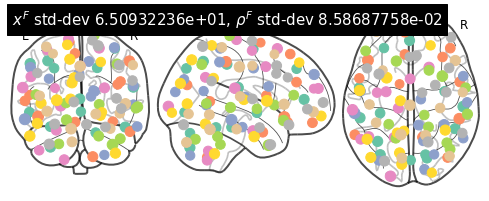

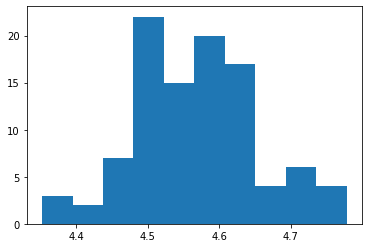

(<nilearn.plotting.displays.OrthoProjector at 0x7fa7a42db790>,
 tensor([[-3.1450e+01, -2.9977e+01, -2.2176e+01],
         [ 3.6414e+01, -7.0571e+00,  6.0112e+01],
         [ 4.7376e+01, -4.6324e+01, -2.2612e+01],
         [-3.4029e+01, -5.9677e+01,  4.7063e+01],
         [-2.7366e+01,  3.8472e+01,  3.9274e+01],
         [-4.4267e-01,  4.6411e+01,  7.0539e+00],
         [ 8.2245e-01, -7.9488e+01, -6.4292e+00],
         [ 1.7883e+01, -7.7440e+01,  3.9669e+01],
         [-5.2614e+01, -3.4849e+01,  4.4134e+01],
         [ 5.5923e+01, -2.3075e+01,  1.9561e+01],
         [-5.3516e+01, -3.2732e+00, -6.9703e+00],
         [ 1.6265e+01, -7.3621e+01, -2.8430e+01],
         [-3.1312e+01, -7.3761e+01, -4.3647e+01],
         [ 3.4252e+01,  2.9080e+01, -1.6927e+01],
         [-1.0976e+01,  6.6509e-01,  6.6796e+01],
         [-5.4278e+00,  3.1808e+01,  5.4818e+01],
         [ 3.9515e+01, -7.6712e+01,  2.2240e+01],
         [ 4.2383e+01,  3.8378e+01,  2.5260e+01],
         [ 1.3279e+01, -5.5304e+01, -

In [8]:
dtfa.visualize_factor_embedding()

In [9]:
dtfa.num_blocks

464

In [10]:
losses = dtfa.train(num_steps=1000, learning_rate={'q': 1e-2, 'p': 1e-3}, log_level=logging.INFO, num_particles=1,
                    batch_size=50, use_cuda=True, checkpoint_steps=100, blocks_batch_size=10, patience=20,
                    blocks_filter=haxby_db.inference_filter(training=True))

10/03/2020 14:58:34 [Epoch 1] (6175ms) Posterior free-energy 8.10316698e+09 = KL from prior 1.58912710e+07 - log-likelihood -8.08727552e+09
10/03/2020 14:58:34 Saving checkpoint...
10/03/2020 14:58:40 [Epoch 2] (6105ms) Posterior free-energy 7.89889075e+09 = KL from prior 8.85765100e+06 - log-likelihood -7.89003366e+09
10/03/2020 14:58:46 [Epoch 3] (6017ms) Posterior free-energy 7.75594701e+09 = KL from prior 6.97906150e+06 - log-likelihood -7.74896845e+09
10/03/2020 14:58:52 [Epoch 4] (5972ms) Posterior free-energy 7.65397043e+09 = KL from prior 5.46895350e+06 - log-likelihood -7.64850125e+09
10/03/2020 14:58:58 [Epoch 5] (6009ms) Posterior free-energy 7.58011904e+09 = KL from prior 4.46775450e+06 - log-likelihood -7.57565235e+09
10/03/2020 14:59:04 [Epoch 6] (6050ms) Posterior free-energy 7.52773990e+09 = KL from prior 3.42602550e+06 - log-likelihood -7.52431360e+09
10/03/2020 14:59:11 [Epoch 7] (6065ms) Posterior free-energy 7.48033126e+09 = KL from prior 2.63523925e+06 - log-likeli

Epoch   382: reducing learning rate of group 0 to 5.0000e-03.
Epoch   382: reducing learning rate of group 1 to 5.0000e-04.
Epoch   382: reducing learning rate of group 2 to 5.0000e-03.
Epoch   382: reducing learning rate of group 3 to 5.0000e-04.


10/03/2020 15:36:50 [Epoch 383] (5973ms) Posterior free-energy 5.22456474e+09 = KL from prior 1.68425400e+06 - log-likelihood -5.22288077e+09
10/03/2020 15:36:56 [Epoch 384] (5963ms) Posterior free-energy 5.19459738e+09 = KL from prior 1.68010638e+06 - log-likelihood -5.19291699e+09
10/03/2020 15:37:02 [Epoch 385] (5958ms) Posterior free-energy 5.19306598e+09 = KL from prior 1.67687600e+06 - log-likelihood -5.19138867e+09
10/03/2020 15:37:08 [Epoch 386] (5975ms) Posterior free-energy 5.19247053e+09 = KL from prior 1.68065625e+06 - log-likelihood -5.19078963e+09
10/03/2020 15:37:14 [Epoch 387] (5935ms) Posterior free-energy 5.19201690e+09 = KL from prior 1.67995400e+06 - log-likelihood -5.19033754e+09
10/03/2020 15:37:20 [Epoch 388] (6004ms) Posterior free-energy 5.19164160e+09 = KL from prior 1.68182638e+06 - log-likelihood -5.18995917e+09
10/03/2020 15:37:26 [Epoch 389] (5961ms) Posterior free-energy 5.19117363e+09 = KL from prior 1.68068200e+06 - log-likelihood -5.18949222e+09
10/03/

Epoch   593: reducing learning rate of group 0 to 2.5000e-03.
Epoch   593: reducing learning rate of group 1 to 2.5000e-04.
Epoch   593: reducing learning rate of group 2 to 2.5000e-03.
Epoch   593: reducing learning rate of group 3 to 2.5000e-04.


10/03/2020 15:58:04 [Epoch 594] (6013ms) Posterior free-energy 5.16781824e+09 = KL from prior 1.74707438e+06 - log-likelihood -5.16607027e+09
10/03/2020 15:58:10 [Epoch 595] (5992ms) Posterior free-energy 5.16513843e+09 = KL from prior 1.74770700e+06 - log-likelihood -5.16338944e+09
10/03/2020 15:58:17 [Epoch 596] (6038ms) Posterior free-energy 5.16484506e+09 = KL from prior 1.74567475e+06 - log-likelihood -5.16310067e+09
10/03/2020 15:58:23 [Epoch 597] (6025ms) Posterior free-energy 5.16456243e+09 = KL from prior 1.74491725e+06 - log-likelihood -5.16282010e+09
10/03/2020 15:58:29 [Epoch 598] (6025ms) Posterior free-energy 5.16450816e+09 = KL from prior 1.74660300e+06 - log-likelihood -5.16276173e+09
10/03/2020 15:58:35 [Epoch 599] (6014ms) Posterior free-energy 5.16434790e+09 = KL from prior 1.74261450e+06 - log-likelihood -5.16260608e+09
10/03/2020 15:58:41 [Epoch 600] (6015ms) Posterior free-energy 5.16432384e+09 = KL from prior 1.74584325e+06 - log-likelihood -5.16257843e+09
10/03/

Epoch   990: reducing learning rate of group 0 to 1.2500e-03.
Epoch   990: reducing learning rate of group 1 to 1.2500e-04.
Epoch   990: reducing learning rate of group 2 to 1.2500e-03.
Epoch   990: reducing learning rate of group 3 to 1.2500e-04.


10/03/2020 16:37:47 [Epoch 991] (5953ms) Posterior free-energy 5.15058944e+09 = KL from prior 1.79491575e+06 - log-likelihood -5.14879437e+09
10/03/2020 16:37:53 [Epoch 992] (5982ms) Posterior free-energy 5.15051162e+09 = KL from prior 1.79737250e+06 - log-likelihood -5.14871603e+09
10/03/2020 16:37:59 [Epoch 993] (5968ms) Posterior free-energy 5.15043174e+09 = KL from prior 1.79471762e+06 - log-likelihood -5.14863718e+09
10/03/2020 16:38:05 [Epoch 994] (5937ms) Posterior free-energy 5.15045427e+09 = KL from prior 1.79284725e+06 - log-likelihood -5.14866125e+09
10/03/2020 16:38:11 [Epoch 995] (5993ms) Posterior free-energy 5.15027200e+09 = KL from prior 1.79528625e+06 - log-likelihood -5.14847693e+09
10/03/2020 16:38:17 [Epoch 996] (5962ms) Posterior free-energy 5.15029453e+09 = KL from prior 1.79284862e+06 - log-likelihood -5.14850099e+09
10/03/2020 16:38:23 [Epoch 997] (5974ms) Posterior free-energy 5.15020134e+09 = KL from prior 1.79557175e+06 - log-likelihood -5.14840422e+09
10/03/

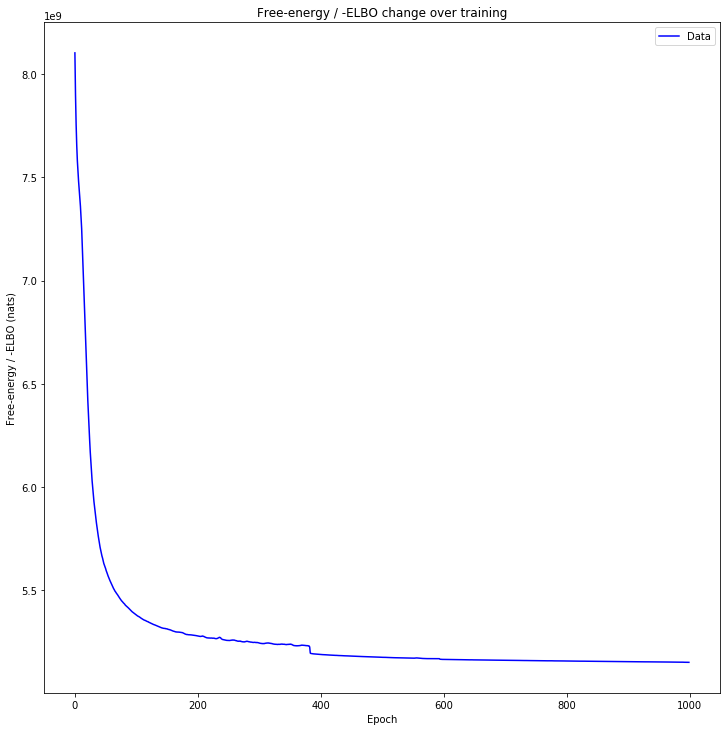

In [11]:
utils.plot_losses(losses)

In [12]:
losses = dtfa.train(num_steps=1000, learning_rate={'q': 1e-2, 'p': 1e-3}, log_level=logging.INFO, num_particles=1,
                    batch_size=50, use_cuda=True, checkpoint_steps=100, blocks_batch_size=10, patience=20,
                    blocks_filter=haxby_db.inference_filter(training=False))

10/03/2020 16:38:42 [Epoch 1] (687ms) Posterior free-energy 1.27994419e+09 = KL from prior 1.02253195e+05 - log-likelihood -1.27984192e+09
10/03/2020 16:38:42 Saving checkpoint...
10/03/2020 16:38:42 [Epoch 2] (694ms) Posterior free-energy 1.24978266e+09 = KL from prior 9.89241562e+04 - log-likelihood -1.24968371e+09
10/03/2020 16:38:43 [Epoch 3] (694ms) Posterior free-energy 1.22466496e+09 = KL from prior 9.69821484e+04 - log-likelihood -1.22456794e+09
10/03/2020 16:38:44 [Epoch 4] (690ms) Posterior free-energy 1.20833254e+09 = KL from prior 9.55078516e+04 - log-likelihood -1.20823706e+09
10/03/2020 16:38:44 [Epoch 5] (690ms) Posterior free-energy 1.17556198e+09 = KL from prior 9.45580781e+04 - log-likelihood -1.17546752e+09
10/03/2020 16:38:45 [Epoch 6] (690ms) Posterior free-energy 1.16085542e+09 = KL from prior 9.41575781e+04 - log-likelihood -1.16076134e+09
10/03/2020 16:38:46 [Epoch 7] (687ms) Posterior free-energy 1.13654080e+09 = KL from prior 9.25624375e+04 - log-likelihood -1

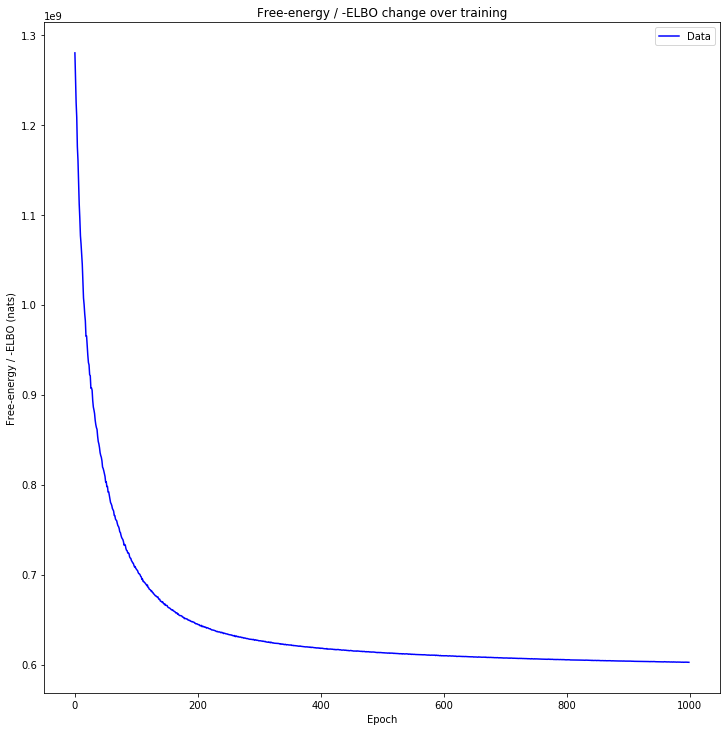

In [13]:
utils.plot_losses(losses)

In [14]:
def task_labeler(task):
    return task

def rest_task_labeler(task):
    if task == 'rest':
        return 'Rest'
    else:
        return 'Task'

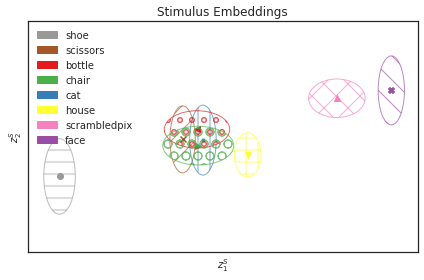

In [15]:
dtfa.scatter_task_embedding(labeler=task_labeler, figsize=None, colormap='Set1',
                            filename='haxby_norest_task_embedding.pdf')

In [16]:
def subject_labeler(subject):
    return 'Subject %d' % subject

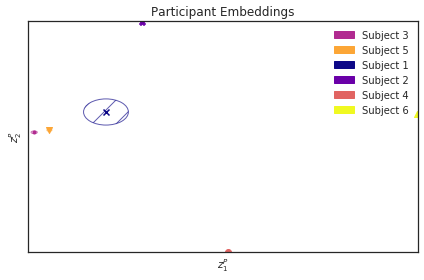

In [17]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, figsize=None, colormap='plasma')

In [18]:
def block_task_labeler(b):
    task = b.task
    return task

10/03/2020 16:50:21 Plotting factors for Participant 6, run 8


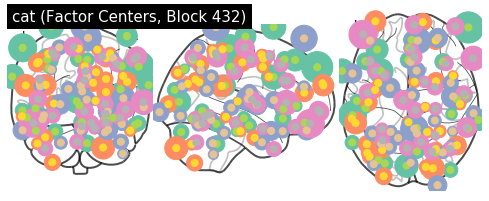

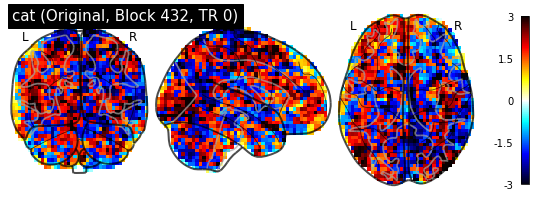

10/03/2020 16:50:23 Reconstruction Error (Frobenius Norm): 1.15776436e+02 out of 6.34683105e+02


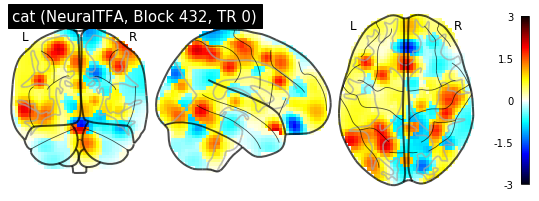

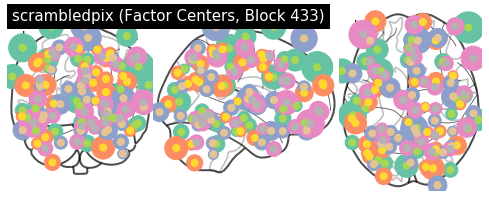

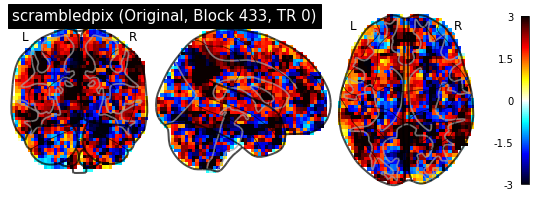

10/03/2020 16:50:26 Reconstruction Error (Frobenius Norm): 1.24268372e+02 out of 5.72112305e+02


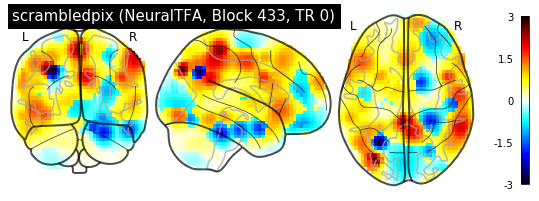

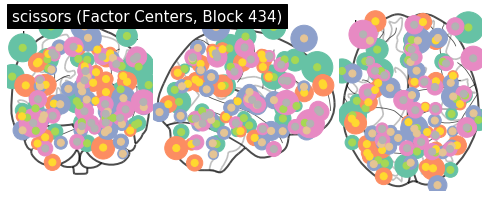

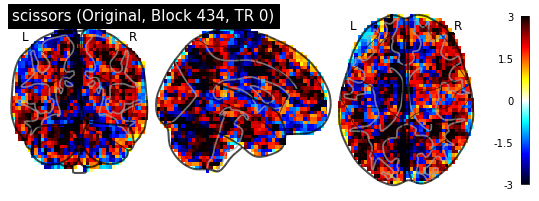

10/03/2020 16:50:29 Reconstruction Error (Frobenius Norm): 1.41451859e+02 out of 6.23831787e+02


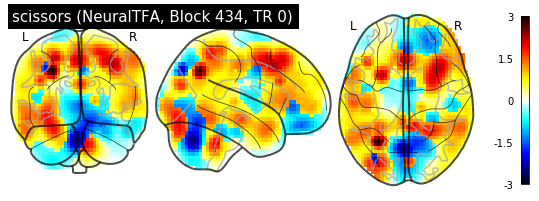

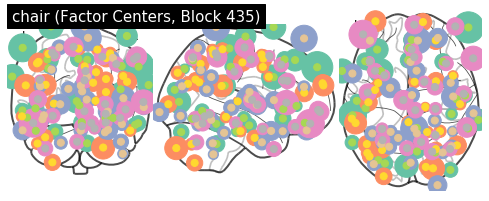

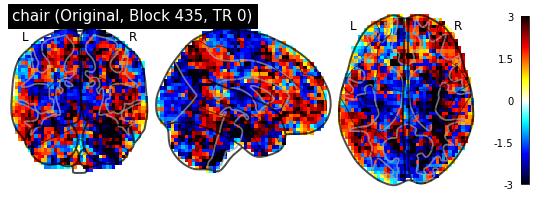

10/03/2020 16:50:32 Reconstruction Error (Frobenius Norm): 1.10443443e+02 out of 5.63255371e+02


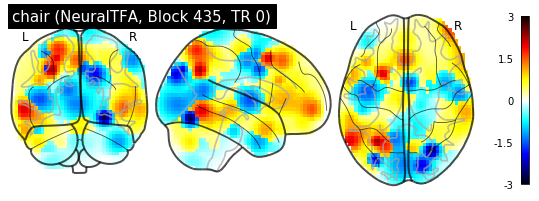

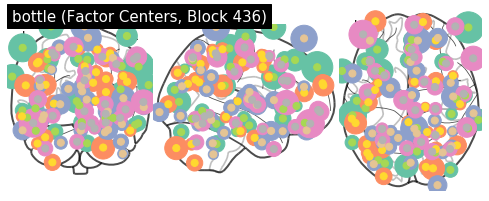

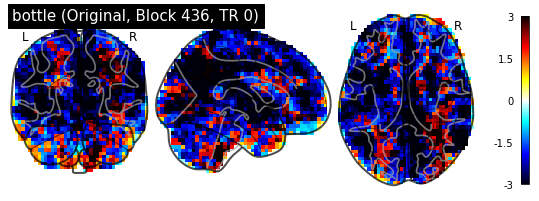

10/03/2020 16:50:34 Reconstruction Error (Frobenius Norm): 1.44808243e+02 out of 7.39638733e+02


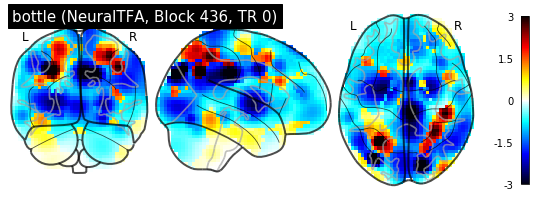

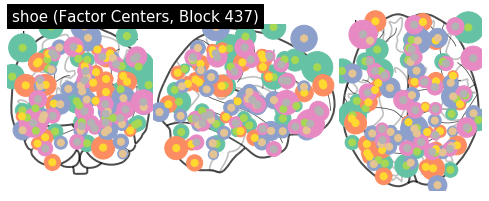

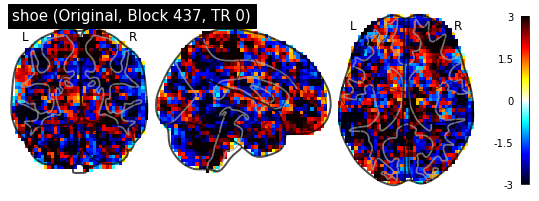

10/03/2020 16:50:37 Reconstruction Error (Frobenius Norm): 1.23159813e+02 out of 5.71527283e+02


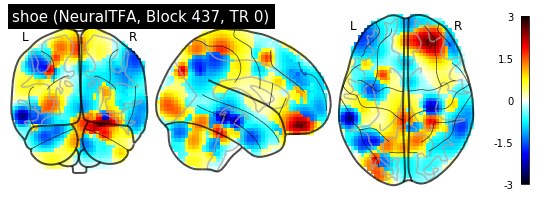

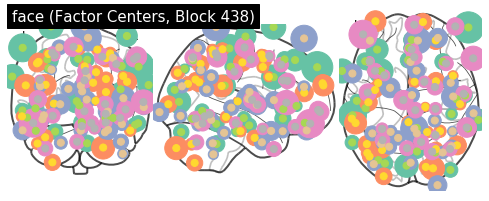

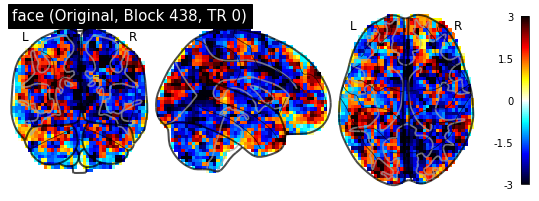

10/03/2020 16:50:40 Reconstruction Error (Frobenius Norm): 1.16636063e+02 out of 5.92858643e+02


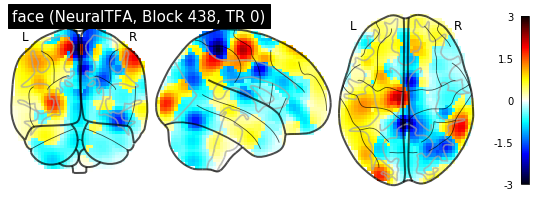

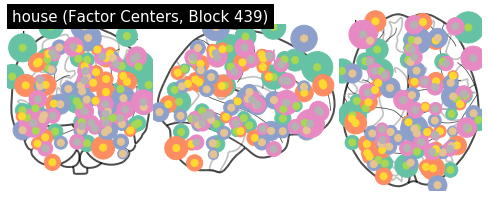

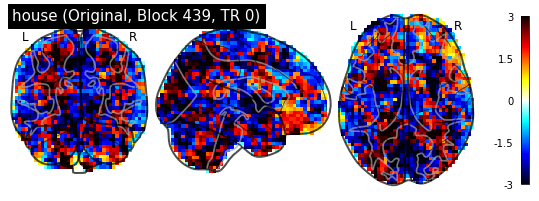

10/03/2020 16:50:43 Reconstruction Error (Frobenius Norm): 1.07804642e+02 out of 6.20795837e+02


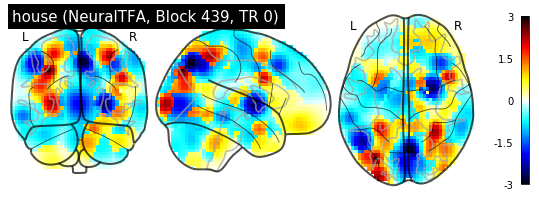

In [19]:
subject_runs = set([(block.subject, block.run) for block in dtfa._blocks])

for i in np.random.choice(range(len(subject_runs)), 1):
    subject, run = list(subject_runs)[i]
    logging.info('Plotting factors for Participant %d, run %d' % (subject, run))
    blocks = [block for block in dtfa._blocks if block.subject == subject and block.run == run]
    blocks.sort(key=lambda b: b.start_time)
    for block in blocks:
        index = dtfa._blocks.index(block)
        dtfa.plot_factor_centers(index, labeler=block_task_labeler)
        dtfa.plot_original_brain(index, labeler=block_task_labeler)
        dtfa.plot_reconstruction(index, labeler=block_task_labeler)

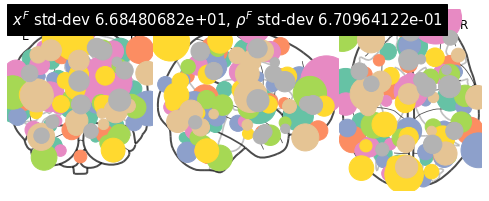

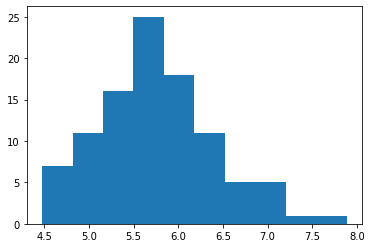

(<nilearn.plotting.displays.OrthoProjector at 0x7fa744fa71d0>,
 tensor([[-3.1465e+01, -4.6983e+01, -2.0743e+01],
         [ 4.1883e+01, -1.4306e+01,  5.7347e+01],
         [ 3.6240e+01, -5.9937e+01, -2.0455e+01],
         [-2.9987e+01, -5.8115e+01,  4.6846e+01],
         [-2.2957e+01,  3.4738e+01,  2.8356e+01],
         [ 2.6225e+00,  4.0368e+01, -1.0255e+01],
         [-1.2107e+01, -8.2000e+01, -4.5366e+00],
         [ 1.7299e+01, -7.6774e+01,  3.4205e+01],
         [-5.1650e+01, -3.9056e+01,  4.9448e+01],
         [ 5.6777e+01, -3.7465e+01,  1.7742e+01],
         [-6.7731e+01, -1.4546e+00,  1.1213e-01],
         [ 1.6143e+01, -7.9605e+01, -3.3117e+01],
         [-2.8416e+01, -7.2653e+01, -4.2813e+01],
         [ 2.5982e+01,  5.3364e+01, -2.9858e+01],
         [-1.9454e+01, -6.1633e+00,  5.3196e+01],
         [-1.3715e+00,  2.1596e+01,  6.2971e+01],
         [ 3.1865e+01, -7.6469e+01,  3.1753e+01],
         [ 4.2249e+01,  2.0507e+01,  2.9253e+01],
         [ 2.9012e-01, -5.5727e+01, -

In [20]:
dtfa.visualize_factor_embedding()

In [21]:
dtfa.average_reconstruction_error(weighted=False,
                                  blocks_filter=haxby_db.inference_filter(training=True))

10/03/2020 16:50:53 Average reconstruction error (MSE): 5.23741314e+02 +/- 4.25452578e+01
10/03/2020 16:50:53 Average data norm (Euclidean): 6.02548870e+02 +/- 6.10153338e+01
10/03/2020 16:50:53 Percent average reconstruction error: 87.174595 +/- 4.07106738e+00


(array([557.18621826, 533.94848633, 497.71984863, 505.49606323,
        526.15081787, 507.63552856, 510.7532959 , 485.53872681,
        556.11791992, 527.38079834, 500.97332764, 448.06048584,
        468.29714966, 487.06625366, 546.59698486, 539.05102539,
        612.10925293, 546.10284424, 505.40213013, 530.0592041 ,
        476.05212402, 510.19543457, 513.13116455, 476.46353149,
        584.10443115, 522.47564697, 464.54162598, 492.49752808,
        529.87103271, 490.37649536, 504.11453247, 537.47918701,
        594.58312988, 497.48440552, 495.81097412, 518.55450439,
        525.38299561, 507.090271  , 542.90057373, 489.81167603,
        522.74981689, 534.29138184, 484.59451294, 454.3548584 ,
        505.86779785, 550.89910889, 516.23474121, 546.88330078,
        453.23382568, 448.6852417 , 466.45413208, 448.15609741,
        464.03390503, 465.06887817, 429.70010376, 494.82165527,
        503.75405884, 459.20349121, 410.11300659, 437.17175293,
        457.69790649, 453.74603271, 461.

In [22]:
dtfa.free_energy(batch_size=50, use_cuda=True, blocks_batch_size=10, num_particles=1, sample_size=100,
                 blocks_filter=haxby_db.inference_filter(training=False))

[[602508800.0, -602352256.0, 156635.515625],
 [602687296.0, -602227712.0, 157316.171875]]